**Sequence-to-Sequence Models – A Backdrop**

Sequence-to-sequence (seq2seq) models in NLP are used to convert sequences of Type A to sequences of Type B. For example, translation of English sentences to German sentences is a sequence-to-sequence task.

Recurrent Neural Network (RNN) based sequence-to-sequence models have garnered a lot of traction ever since they were introduced in 2014. Most of the data in the current world are in the form of sequences – it can be a number sequence, text sequence, a video frame sequence or an audio sequence.

The performance of these seq2seq models was further enhanced with the addition of the Attention Mechanism in 2015. How quickly advancements in NLP have been happening in the last 5 years – incredible!

`These sequence-to-sequence models are pretty versatile and they are used in a variety of NLP tasks, such as`

1. Machine Translation
2. Text Summarization
3. Speech Recognition
4. Question-Answering System

**How does a seq-to-seq model work**

- Both Encoder and Decoder are RNNs
- At every time step in the Encoder, the RNN takes a word vector (xi) from the input sequence and a hidden state (Hi) from the - previous time step
- The hidden state is updated at each time step
- The hidden state from the last unit is known as the context vector. This contains information about the input sequence
- This context vector is then passed to the decoder and it is then used to generate the target sequence (English phrase)
- If we use the Attention mechanism, then the weighted sum of the hidden states are passed as the context vector to the decoder

**Challenges of seq-to-seq model**

- Dealing with long-range dependencies is still challenging
- The sequential nature of the model architecture prevents parallelization

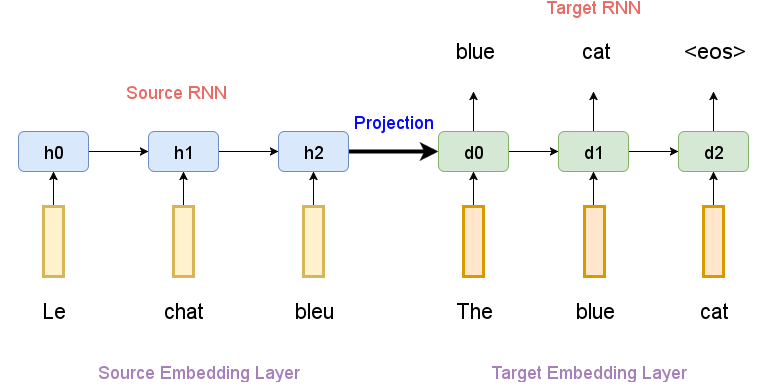

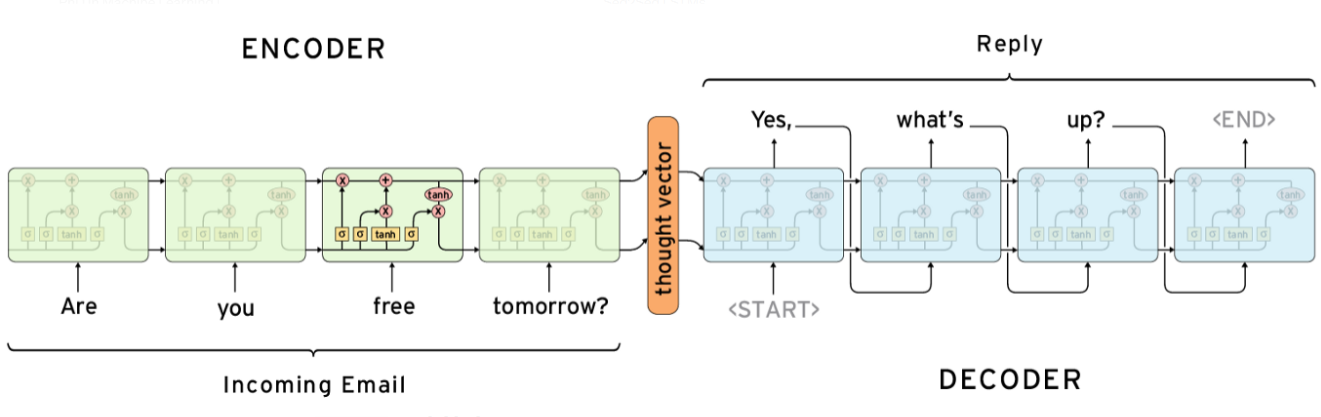

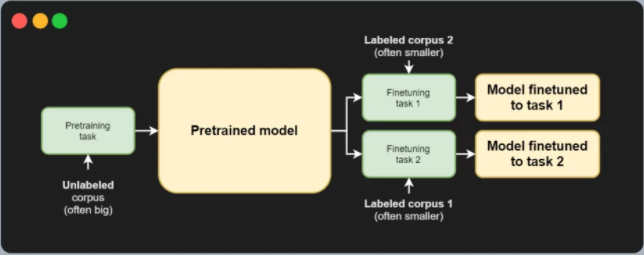

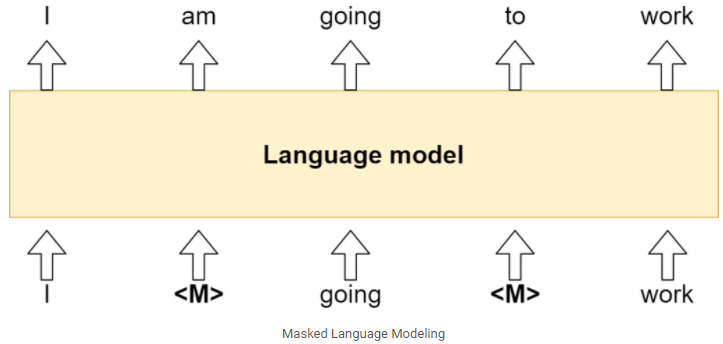

**Transformer Model Architecture**

The Transformer in NLP is a novel architecture that aims to solve sequence-to-sequence tasks while handling long-range dependencies with ease. The Transformer was proposed in the paper Attention Is All You Need. It is recommended reading for anyone interested in NLP.

        “The Transformer is the first transduction model relying entirely on self-attention to compute representations of its input and output without using sequence-aligned RNNs or convolution.”

'Transductio' means the conversion of input sequences into output sequences. The idea behind Transformer is to handle the dependencies between input and output with attention and recurrence completely

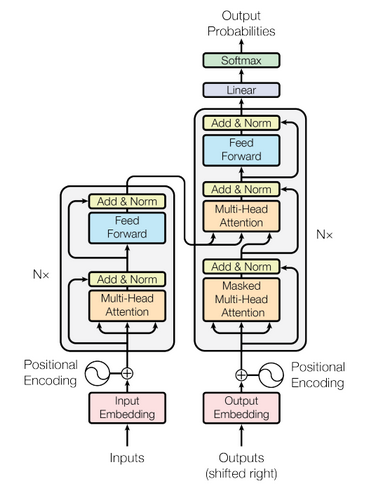

In [6]:
# Checking the current working directory
import os
os.getcwd()

'C:\\Users\\Administrator\\Downloads\\Python_work\\Edureka'

Check [this documentation link](https://huggingface.co/transformers/quicktour.html) for further understanding of transformers

In [1]:
# Insstalling the transformers libraries
!pip install transformers

In [2]:
# Upgrading pip to latest version
!c:\users\administrator\anaconda3\python.exe -m pip install --upgrade pip

In [ ]:
# pyarrow version > 0.17.0 required
# !pip install pyarrow 
pyarrow.__version__

**Sentiment Analysis**

In [4]:
from transformers import pipeline

# Sample sentence
st = f"I do not like horror movies"

seq = pipeline(task="sentiment-analysis", model='nlptown/bert-base-multilingual-uncased-sentiment')
print(f"Result: { seq(st) }")


Result: [{'label': '2 stars', 'score': 0.4139205515384674}]


**Question Answering**

In [7]:
from transformers import pipeline

sentence = r"""
Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had
peeped into the book her sister was reading, but it had no pictures or conversations in it, “and what is the use of a book,” 
thought Alice “without pictures or conversations?” So she was considering in her own mind (as well as she could, for the hot
day made her feel very sleepy and stupid), whether the pleasure of making a daisy chain would be worth the trouble of getting
up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her.
"""

output = pipeline("question-answering", model="csarron/roberta-base-squad-v1")
question = output(question="Who was reading a book?", context=sentence)
print(f"Answer: {question['answer']}")


Answer: her sister


**Text Generation**

In [15]:
# from transformers import timeline

nlp = pipeline(task='text-generation', model='gpt2')
nlp("My name is Fernando, I am from Mexico and", max_length=30, num_return_sequences=5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'My name is Fernando, I am from Mexico and live in Los Alamos, New Mexico. The next level is the Los Alamos Science Center.'},
 {'generated_text': "My name is Fernando, I am from Mexico and I am a member of La Familia.\n\nWe're all just very lucky, you know"},
 {'generated_text': 'My name is Fernando, I am from Mexico and I am one of the oldest living members of my class but I do not know anything about Spanish,'},
 {'generated_text': 'My name is Fernando, I am from Mexico and I\'m from Peru. I\'m pretty good."\n\nHe\'s a native and a Spanish American'},
 {'generated_text': 'My name is Fernando, I am from Mexico and I speak Cibola with my daughter. And now I have to speak my language. I started'}]

**Named Entity Recognition**

In [10]:
from transformers import pipeline

seq = r"""
I am Fernando, and I live in Mexico. I am a Machine Learning Engineer, and I work at Hitch.
"""

nlp = pipeline(task='ner')
for item in nlp(seq):
    print(f"{item['word'], item['entity']}")


('Fernando', 'I-PER')
('Mexico', 'I-LOC')
('Learning', 'I-ORG')
('Engineer', 'I-MISC')
('Hit', 'I-ORG')
('##ch', 'I-ORG')


- I-MISC, Miscellaneous entity
- I-PER, Person’s name
- I-ORG, Organisation
- I-LOC, Location

**Text Summarization**

In [5]:
from transformers import pipeline

txt = r'''
Machine learning is the study of computer algorithms that improve automatically through experience and by the use of data. It is
seen as a part of artificial intelligence. Machine learning is an important component of the growing field of data science.
Machine learning, deep learning, and neural networks are all sub-fields of artificial intelligence . As big data continues to
grow, the market demand for data scientists will increase, requiring them to assist in the identification of the most relevant
business questions. Machine learning is a method of data analysis that automates analytical model building. It is a branch of
artificial intelligence based on the idea that systems can learn from data, identify patterns and make decisions with minimal
human intervention.
'''

nlp = pipeline(task='summarization')
nlp(txt, max_length=130, min_length=30)

[{'summary_text': ' Machine learning is the study of computer algorithms that improve automatically through experience and by the use of data . Machine learning, deep learning, and neural networks are all sub-fields of artificial intelligence . As big data continues to grow, the market demand for data scientists will increase .'}]

**Language Modeling**

Language modeling is the task of fitting a model to a corpus, which can be domain specific. All popular transformer-based models are trained using a variant of language modeling, e.g. BERT with masked language modeling, GPT-2 with causal language modeling.

Language modeling can be useful outside of pretraining as well, for example to shift the model distribution to be domain-specific: using a language model trained over a very large corpus, and then fine-tuning it to a news dataset or on scientific papers

**Masked Language Modeling**

Masked language modeling is the task of masking tokens in a sequence with a masking token, and prompting the model to fill that mask with an appropriate token. This allows the model to attend to both the right context (tokens on the right of the mask) and the left context (tokens on the left of the mask)

In [11]:
from transformers import pipeline

unmasker = pipeline("fill-mask")

In [12]:
from pprint import pprint

pprint(unmasker(f"HuggingFace is creating a {unmasker.tokenizer.mask_token} that the community uses to solve NLP tasks."))

[{'score': 0.17927467823028564,
  'sequence': 'HuggingFace is creating a tool that the community uses to solve '
              'NLP tasks.',
  'token': 3944,
  'token_str': ' tool'},
 {'score': 0.11349418014287949,
  'sequence': 'HuggingFace is creating a framework that the community uses to '
              'solve NLP tasks.',
  'token': 7208,
  'token_str': ' framework'},
 {'score': 0.05243547633290291,
  'sequence': 'HuggingFace is creating a library that the community uses to '
              'solve NLP tasks.',
  'token': 5560,
  'token_str': ' library'},
 {'score': 0.034935418516397476,
  'sequence': 'HuggingFace is creating a database that the community uses to '
              'solve NLP tasks.',
  'token': 8503,
  'token_str': ' database'},
 {'score': 0.028602518141269684,
  'sequence': 'HuggingFace is creating a prototype that the community uses to '
              'solve NLP tasks.',
  'token': 17715,
  'token_str': ' prototype'}]


**Translation**

In [14]:
from transformers import pipeline

txt = r'''
Machine learning is a branch of artificial intelligence (AI) and computer science which focuses on the use of data and
algorithms to imitate the way that humans learn, gradually improving its accuracy
'''

# Enlgish to French translation
nlp = pipeline(task='translation_en_to_fr')
print(f"{nlp(txt)[0]['translation_text']}")


L’apprentissage automatique est une branche de l’intelligence artificielle (AI) et de la science informatique qui se concentre sur l’utilisation de données et d’algorithmes pour imiter la façon dont les humains apprennent, en améliorant progressivement leur précision.
